### Import Packages

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys

### Import Datasets

In [42]:
quiet = pd.read_csv("spiro-quiet.csv")
deep = pd.read_csv("spiro-deep.csv")
run = pd.read_csv("spiro-run.csv")

dataset = [quiet, deep, run]
run

,Run 1: Time (s),Run 1: Flow Rate (L/s),Run 1: Volume (L),Run 2: Time (s),Run 2: Flow Rate (L/s),Run 2: Volume (L),Run 3: Time (s),Run 3: Flow Rate (L/s),Run 3: Volume (L)
0,0.000000,-0.116638,0.000000,0.000000,-0.002380,0.000000,0.000000,-0.184478,-0.000000
1,0.016667,-0.155319,0.002266,0.016667,0.007736,-0.000045,0.016667,-0.213638,0.003318
2,0.033334,-0.184479,0.005098,0.033334,0.007736,-0.000174,0.033334,-0.223754,0.006963
3,0.050001,-0.223160,0.008495,0.050001,-0.002380,-0.000218,0.050001,-0.213638,0.010608
4,0.066668,-0.232681,0.012294,0.066668,0.007736,-0.000263,0.066668,-0.174957,0.013846
...,...,...,...,...,...,...,...,...,...
17995,299.922665,-0.329681,-0.933501,NaN,NaN,NaN,NaN,NaN,NaN
17996,299.939332,-0.358841,-0.927763,NaN,NaN,NaN,NaN,NaN,NaN
17997,299.955999,-0.378479,-0.921619,NaN,NaN,NaN,NaN,NaN,NaN
17998,299.972666,-0.407043,-0.915073,NaN,NaN,NaN,NaN,NaN,NaN


### Create Graphs

#### Define Function for Graphing

In [59]:
def get_name(variable):
    return f'{variable=}'.split('=')[0]



def plot(dataset, run_count=1):
    dataset_name = f'{dataset=}'.split('=')[0]
    # plt.figure(run_count)
    # Plot 1
    plt.subplot(211)
    plt.title("Time(s) vs. Volume(L)")
    plt.xlabel("Time (s)")
    plt.ylabel("Volume (L)")
    plt.scatter(dataset[f'Run {run_count}: Time (s)'], dataset[f'Run {run_count}: Volume (L)'], label=dataset_name)
    
    # Plot 2
    plt.subplot(212)
    plt.title("Volume(L) vs. Flow Rate (L/s)")
    plt.xlabel("Volume (L)")
    plt.ylabel("Flow Rate (L/s)")
    plt.scatter(dataset[f'Run {run_count}: Volume (L)'], dataset[f"Run {run_count}: Flow Rate (L/s)"], label=dataset_name)

    plt.legend()


def segmenting(dataset, time_length=180, run_count=1):
    vars(sys.modules[__name__])[f"{dataset}_segmented"] = dataset[dataset[f'Run {run_count}: Time (s)'] < time_length]

#### Graphs

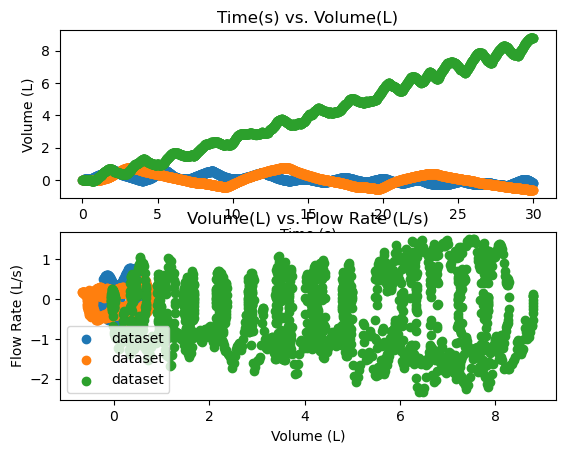

In [60]:
for i in range(len(dataset)):
    segmenting(dataset[i], time_length=30, run_count=i+1)
    plot(vars(sys.modules[__name__])[f"{dataset[i]}_segmented"], run_count=i+1)